<a href="https://colab.research.google.com/github/JUANCARLOST-LAB/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Analysis

In this project I will do an analysis of the diabetes prediction dataset proportioned in kaggle plataform in the following link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data
I will perform some statistical analysis, data visualization, a data null analysis and data wranging, then I will apply some Machine Learning Models to predict whether a person has diabates or not based on their characteristics.

# Data Analysis



## Import Libraries

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Statistical Analysis

In [24]:
url = '/content/drive/MyDrive/Datasets/diabetes_prediction_dataset.csv'

df_diabetes = pd.read_csv(url, sep = ',')

df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


**Information of columns**

In [25]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


*Insights*

Doesn't has null data.

In [26]:
# Shape of dataset
df_diabetes.shape

(100000, 9)

*Insights*

Has 100000 rows and 9 columns.

**Statistical information of dataset**

In [27]:
df_diabetes.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,100000,3,Female,58552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,100000.0,NaN,NaN,NaN,41.885856,22.51684,0.08,24.0,43.0,60.0,80.0
hypertension,100000.0,NaN,NaN,NaN,0.07485,0.26315,0.0,0.0,0.0,0.0,1.0
heart_disease,100000.0,NaN,NaN,NaN,0.03942,0.194593,0.0,0.0,0.0,0.0,1.0
smoking_history,100000,6,No Info,35816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,100000.0,NaN,NaN,NaN,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,NaN,NaN,NaN,5.527507,1.070672,3.5,4.8,5.8,6.2,9.0
blood_glucose_level,100000.0,NaN,NaN,NaN,138.05806,40.708136,80.0,100.0,140.0,159.0,300.0
diabetes,100000.0,NaN,NaN,NaN,0.085,0.278883,0.0,0.0,0.0,0.0,1.0


**Insights**

* Age has a minimum of 0.08, meaning it not only contains integer data, it also has float data.
* BMI has outliers, it has a maximum of 95.69 and at the 75% of data the value is 29.58.
* blood_glucose_level has outliers, has a maximum of 300 and at 75% of data the value is 159.
* Diabetes is a categorical data, contains 1 and 0.
* Smoking history is a categorical data, we will analyze it later.
* Gender is categorical data, Male or Female.

In [28]:
# Smoking history column
df_diabetes['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [29]:
# Percentage of appearances of each value
100 * df_diabetes['smoking_history'].value_counts() / df_diabetes.shape[0]

No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: smoking_history, dtype: float64

We can see it contains value No Info which could be considered as null value, we will analyze later what to do with those data, because 35% of the data has the 'No Info' category.

## Data visualization

**How is the distribution among male and female in our data and how are diabetes cases distributed among them?**

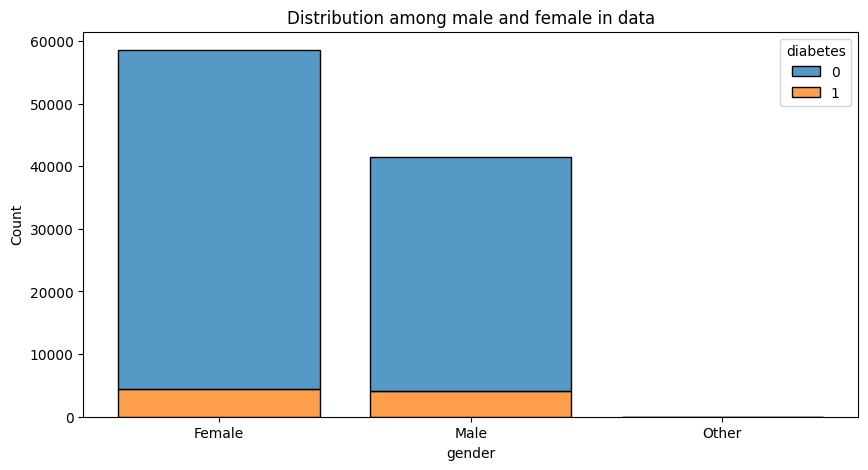

In [30]:
# Create figure
fig, ax = plt.subplots(figsize = (10, 5))

# Create barplot
sns.histplot(data = df_diabetes,
             x = 'gender',
             hue = 'diabetes',
             multiple = 'stack',
             shrink = 0.8,
             ax = ax).set(title = 'Distribution among male and female in data');

**Disribution of ages in our dataset**

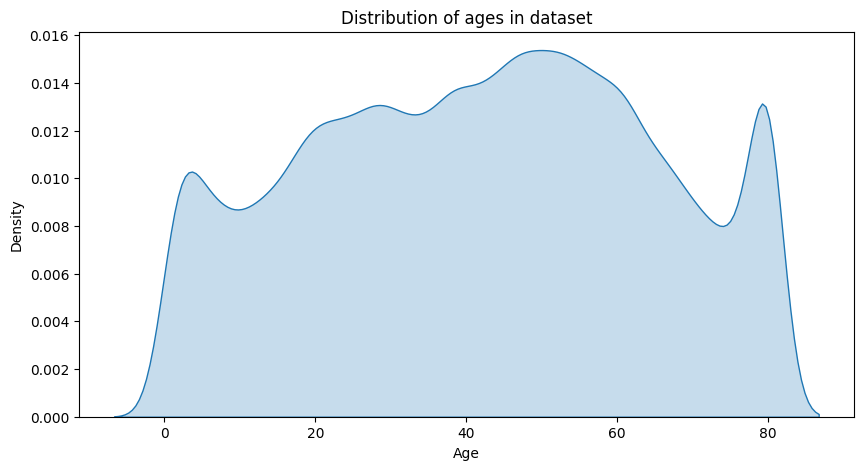

In [31]:
# Create figure
fig, ax = plt.subplots(figsize = (10, 5))

# Create kde plot
sns.kdeplot(data = df_diabetes,
            x = 'age',
            fill = True,
            ax = ax).set(title = 'Distribution of ages in dataset',
                             xlabel = 'Age');

*Conclusion:* Doesn't follows a known distribution

**Distribution of ages divided by diabetes category**

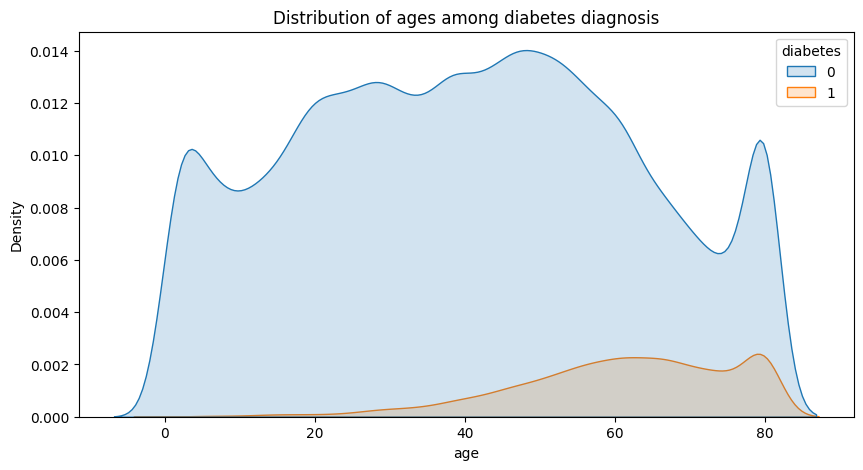

In [32]:
# Create figure
fig, ax = plt.subplots(figsize = (10, 5))

# Create kdeplot
sns.kdeplot(data = df_diabetes,
        x = 'age',
        hue = 'diabetes',
        fill = True,
        alpha = 0.2,
        ax = ax).set(title = 'Distribution of ages among diabetes diagnosis',
                     xlabel = 'age');

*Conclusion:* We can see that people without diabetes have wide range of anges bu people with diabates are usually older people.

**Distribution of bmi divided by diabetes diagnosis**

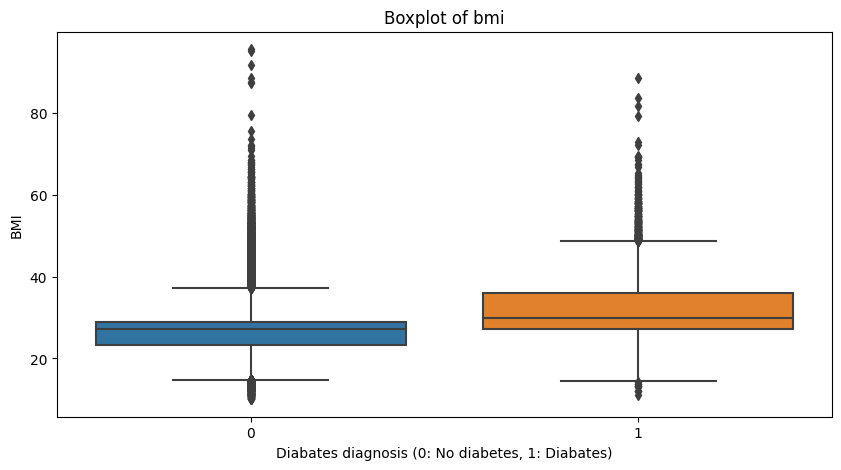

In [33]:
# Create figure
fig, ax = plt.subplots(figsize = (10, 5))

# Create boxplot
sns.boxplot(data = df_diabetes,
            x = 'diabetes',
            y = 'bmi',
            ax = ax).set(title = 'Boxplot of bmi',
                         xlabel = 'Diabates diagnosis (0: No diabetes, 1: Diabates)',
                         ylabel = 'BMI');

*Conclusion:* Usually, people with diabetes have a slightly higher BMI, eventough both groups contains various outliers.

**How is the relation between HbA1c level and blood glucose level?**

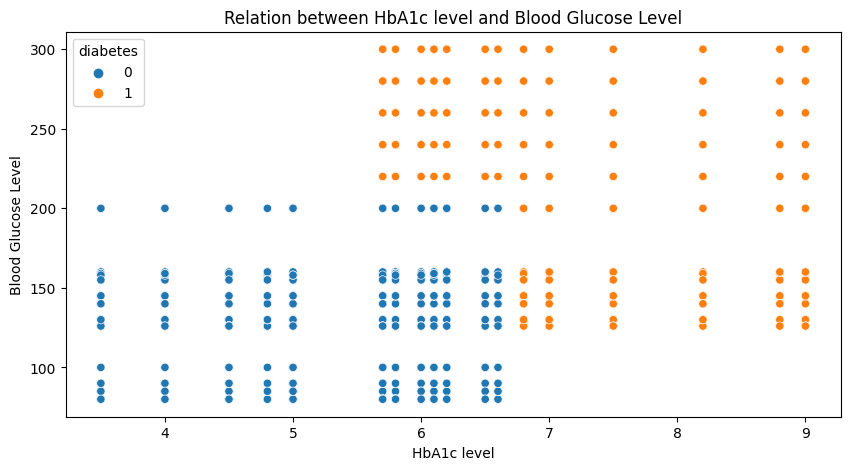

In [34]:
# Create figure
fig, ax = plt.subplots(figsize = (10, 5))

# Create scatterplot
sns.scatterplot(data = df_diabetes,
                x = 'HbA1c_level',
                y = 'blood_glucose_level',
                hue = 'diabetes',
                markers = ['x','o'],
                ax = ax).set(title = 'Relation between HbA1c level and Blood Glucose Level',
                             xlabel = 'HbA1c level',
                             ylabel = 'Blood Glucose Level');

*Conclusion:* We can notice there exist certain correlation between HbA1c Level and Blood Glucose Level but the most notable characteristic is that the diabates diagnosis groups (0 and 1) points are completely separated based on the two previous characteristics, so we can infer that these two variables will become very important for us to predict whether a person has diabetes or not.

**Heatmap of numeric features**

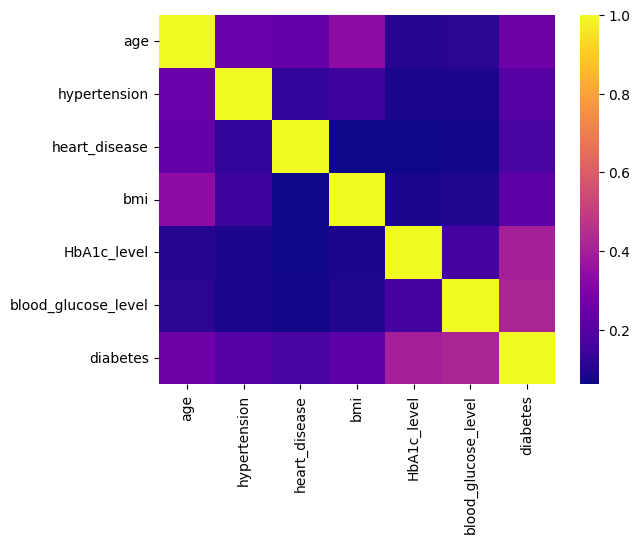

In [35]:
numeric_columns = ['age', 'hypertension','heart_disease','bmi', 'HbA1c_level','blood_glucose_level','diabetes']

numeric_data = df_diabetes[numeric_columns]

# Create heatmap
corr = numeric_data.corr();
sns.heatmap(corr,
            cmap = 'plasma');

In [36]:
# Correlation values
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


# Machine Learning Models

## Decision Tree Classifier
We saw that the diabetes diagnosis were perfectly divided by HbA1c level and Blood Glucose Level so we will build a Decision Tree Classifier to predict the diagnosis.

In [46]:
# Split the data
X = df_diabetes[['HbA1c_level', 'blood_glucose_level']]
y = df_diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [47]:
# Create model
dt = DecisionTreeClassifier(max_depth = 4)

# Train Model
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Obtain accuracy score
acc = accuracy_score(y_pred, y_test)

print(f'Accuracy score with Decision Tree Classifier: {acc}')

Accuracy score with Decision Tree Classifier: 0.9723


We have an accuracy score of 97%, which indicates it's a good model.

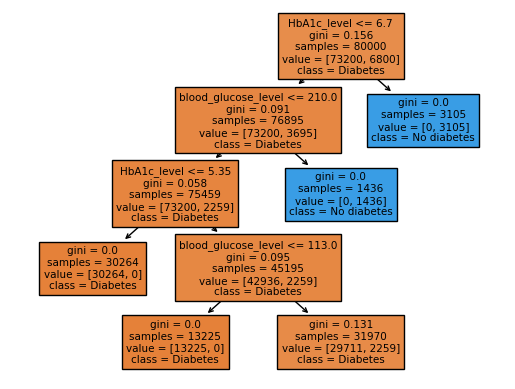

In [51]:
from sklearn import tree
tree.plot_tree(dt,
               feature_names = X.columns,
               class_names = ['Diabetes', 'No diabetes'],
               filled = True);

## Logistic Regression Model

This time I will use age, bmi, HbA1c level and Blood Glucose Level features to predict which had the highest correlation value with diabetes feature.

In [40]:
# Select features
X = df_diabetes[['age', 'bmi', 'HbA1c_level','blood_glucose_level']]
y = df_diabetes['diabetes']

In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,  random_state = 42)

# Standarize data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# Create Model
lr = LogisticRegression()

# Train model
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Accuracy score
acc = accuracy_score(y_pred, y_test)

print(f'Accuracy score with Logistic Regression: {acc}')

Accuracy score with Logistic Regression: 0.9599


The model gives us an accuracy score of 95.99% which is also good.